In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
network=pd.read_csv("Social_Network_Ads.csv")

In [11]:
network.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [3]:
network

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
network.drop(columns=['User ID','Gender'],inplace=True)

In [6]:
network.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(network.drop('Purchased',axis=1),network['Purchased'],test_size=0.3,random_state=0)

In [13]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 280 entries, 92 to 172
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              280 non-null    int64
 1   EstimatedSalary  280 non-null    int64
dtypes: int64(2)
memory usage: 6.6 KB


In [15]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 280 entries, 92 to 172
Series name: Purchased
Non-Null Count  Dtype
--------------  -----
280 non-null    int64
dtypes: int64(1)
memory usage: 4.4 KB


In [16]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 132 to 343
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              120 non-null    int64
 1   EstimatedSalary  120 non-null    int64
dtypes: int64(2)
memory usage: 2.8 KB


In [17]:
x_train.describe()

,Age,EstimatedSalary
count,280.000000,280.000000
mean,37.864286,69807.142857
std,10.218201,34641.201654
min,18.000000,15000.000000
25%,30.000000,43000.000000
50%,37.000000,70500.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


In [20]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [21]:
x_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [22]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [23]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [24]:
x_train_scaled.head()

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047


In [25]:
x_test_scaled.head()

,Age,EstimatedSalary
0,-0.771013,0.497201
1,0.013305,-0.572804
2,-0.280814,0.150172
3,-0.771013,0.265849
4,-0.280814,-0.572804


In [30]:
import numpy as np
np.round(x_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

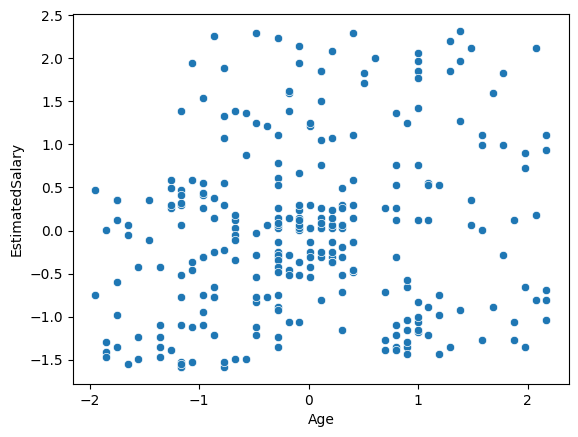

In [35]:
# Effect Of Scaling
sns.scatterplot(data=x_train_scaled,x='Age',y='EstimatedSalary')

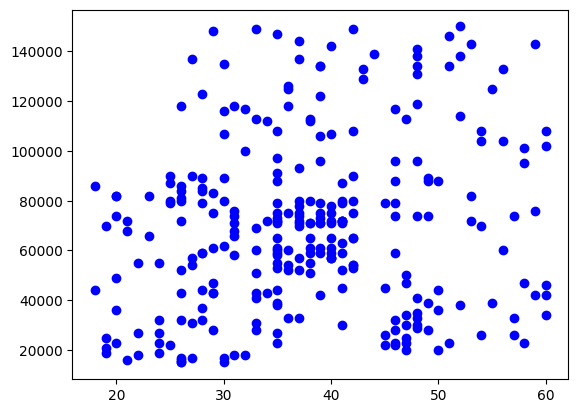

In [41]:
plt.scatter(x_train['Age'],x_train['EstimatedSalary'],color='blue')


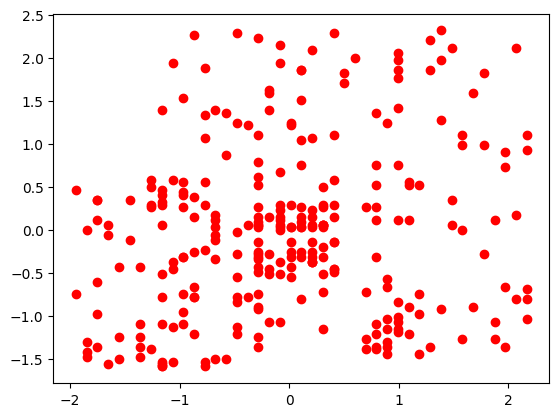

In [40]:
plt.scatter(x_train_scaled['Age'],x_train_scaled['EstimatedSalary'],color='red')

<Axes: xlabel='Age', ylabel='Density'>

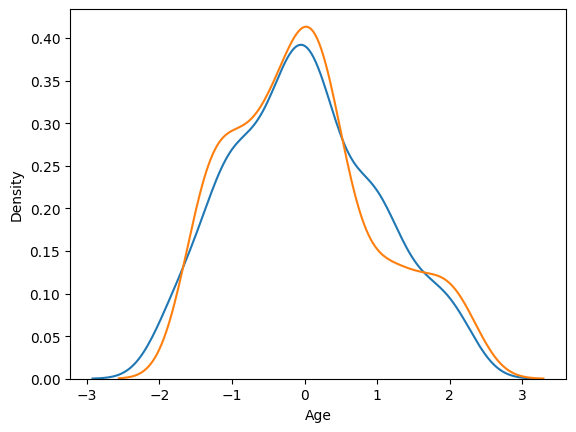

In [43]:
sns.kdeplot(x_train_scaled['Age'])
sns.kdeplot(x_train_scaled['EstimatedSalary'])

<Axes: xlabel='Age', ylabel='Density'>

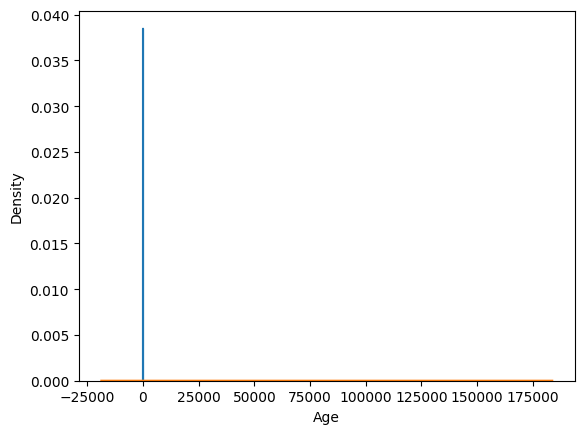

In [44]:
sns.kdeplot(x_train['Age'])
sns.kdeplot(x_train['EstimatedSalary'])

In [45]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr_scaled=LogisticRegression()

In [46]:
lr.fit(x_train,y_train)
lr_scaled.fit(x_train_scaled,y_train)

LogisticRegression()

In [47]:
Y_predict=lr.predict(x_test)
Y_predict_scaled=lr_scaled.predict(x_test_scaled)

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
print('Actual Score is:',accuracy_score(y_test,Y_predict))
print('Scaled Score is:',accuracy_score(y_test,Y_predict_scaled))

Actual Score is: 0.6583333333333333
Scaled Score is: 0.8666666666666667
